<h2><center>Assignment 3</center><h2>
<h4><center>Submission by Chitrank Dave (8938766)</center></h4>

> ### **Part 1: Clustering**

Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


sns.set(style="whitegrid")

In [2]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [3]:
len(set(y))

3

In [4]:
X.size

600

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

##### 1. Utilize one of the dimensionality reduction techniques discussed in class to reduce the number of dimensions from 4 to 2.

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(150, 2)

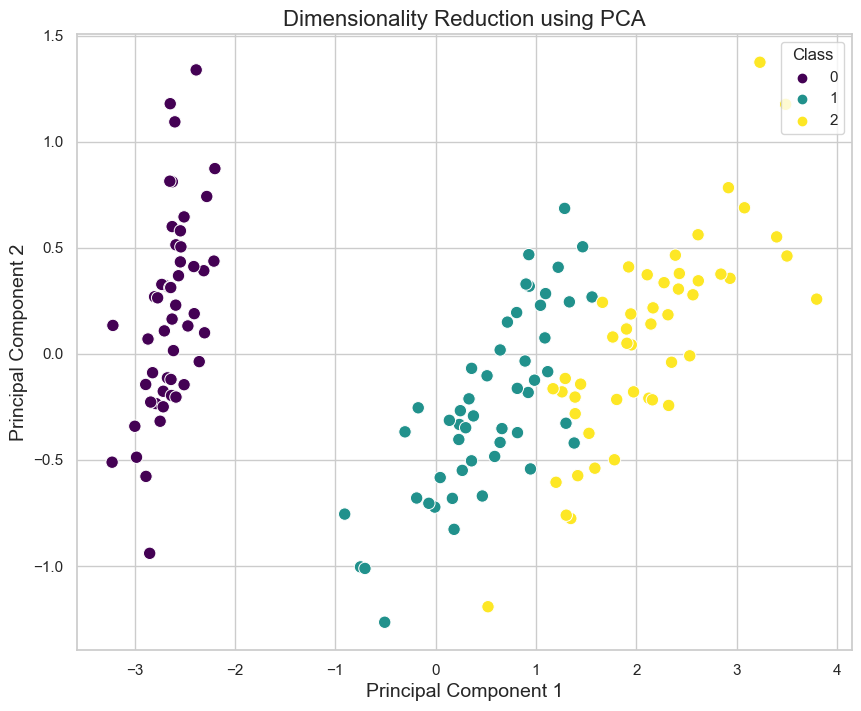

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],
                hue=y, palette='viridis', edgecolor='w', s=80)

plt.title('Dimensionality Reduction using PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.legend(title='Class', loc='upper right')
plt.show()

##### 2. Utilize a clustering technique to cluster the flowers (after dimensionality reduction) into N clusters where N is the number of flowers available in the dataset.

In [9]:
num_clusters = len(set(y))
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
clusters = kmeans.fit_predict(X_reduced)


##### 3. Plot the clustered data points on a 2D grid and show the formed clusters. Comment on whether each cluster corresponds to a flower type

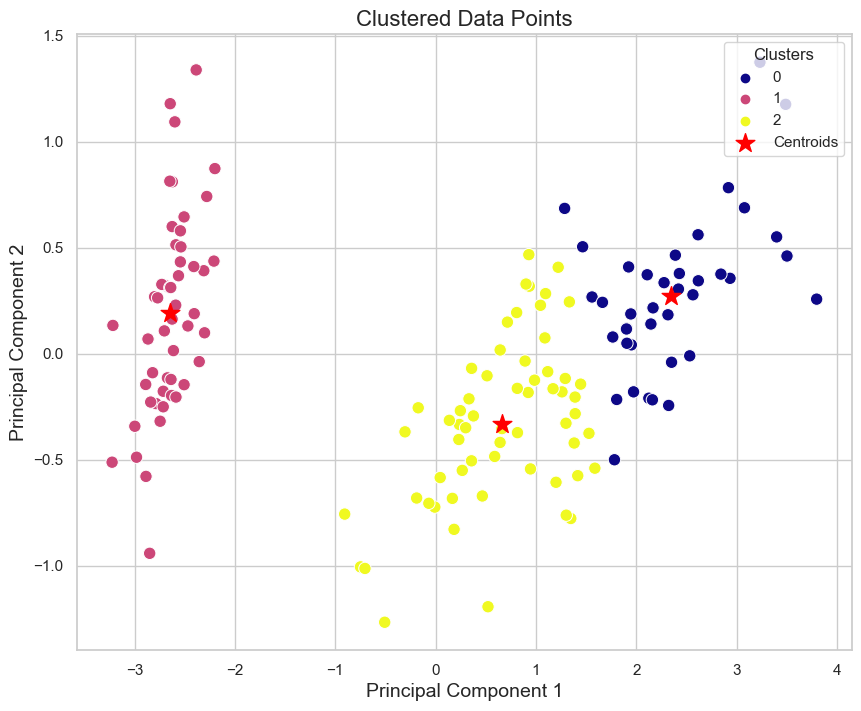

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='plasma', edgecolor='w', s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')

plt.title('Clustered Data Points', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.legend(title='Clusters', loc='upper right')
plt.show()

Clusters belonging to Flower type:


* Magenta   -  Setosa 

* Yellow    -  Versicolor

* Violet    -  Virginica

The Setosa is clearly separated from the other two species along the first principal component. This tells us that the this has a distinct set of features that can be used to distinguish it from the other two species.

The versicolor and virginica species are more overlapping along the first principal component, but they are still somewhat separated. This suggests that the versicolor and virginica species share some similarities, but they also have some distinct features.

The second principal component provides further separation between the versicolor and virginica species. This suggests that the second principal component captures additional variation in the Iris data that is useful for distinguishing between the versicolor and virginica species.

##### 4. Determine if normalization of features leads to better dimensionality reduction and clustering of classes of flowers

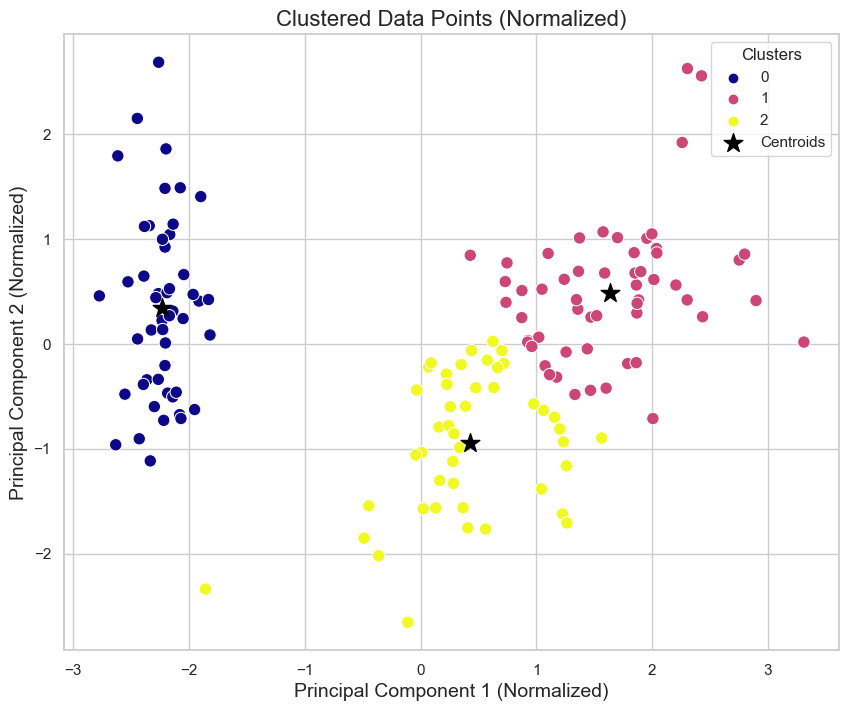

In [11]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized_reduced = pca.fit_transform(X_normalized)


kmeans_normalized = KMeans(n_clusters=num_clusters, n_init='auto')
clusters_normalized = kmeans_normalized.fit_predict(X_normalized_reduced)


clusters_normalized = kmeans_normalized.fit_predict(X_normalized_reduced)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_normalized_reduced[:, 0], y=X_normalized_reduced[:, 1],
                hue=clusters_normalized, palette='plasma', edgecolor='w', s=80)

plt.scatter(kmeans_normalized.cluster_centers_[:, 0], kmeans_normalized.cluster_centers_[
            :, 1], marker='*', s=200, c='black', label='Centroids')

plt.title('Clustered Data Points (Normalized)', fontsize=16)
plt.xlabel('Principal Component 1 (Normalized)', fontsize=14)
plt.ylabel('Principal Component 2 (Normalized)', fontsize=14)

plt.legend(title='Clusters', loc='upper right')
plt.show()

- The points in the two clusters are tightly clustered together, indicating that the data is well-clustered.
- The two clusters are well-separated along the first principal component, indicating that the first principal component captures the most important variation in the data.
- The points in each cluster are more spread out along the second principal component, indicating that there is more variation in the data along this dimension.
- The centroids of the two clusters are located at opposite ends of the first principal component, indicating that the two clusters are maximally separated along this dimension.

> ### **Part 2: Model Training and Evaluation**

In [12]:
df = pd.read_csv('../../practical_labs/datasets/stroke.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
nan_counts = df.isna().sum()
print("Null values in each column:")
print(nan_counts)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Null values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


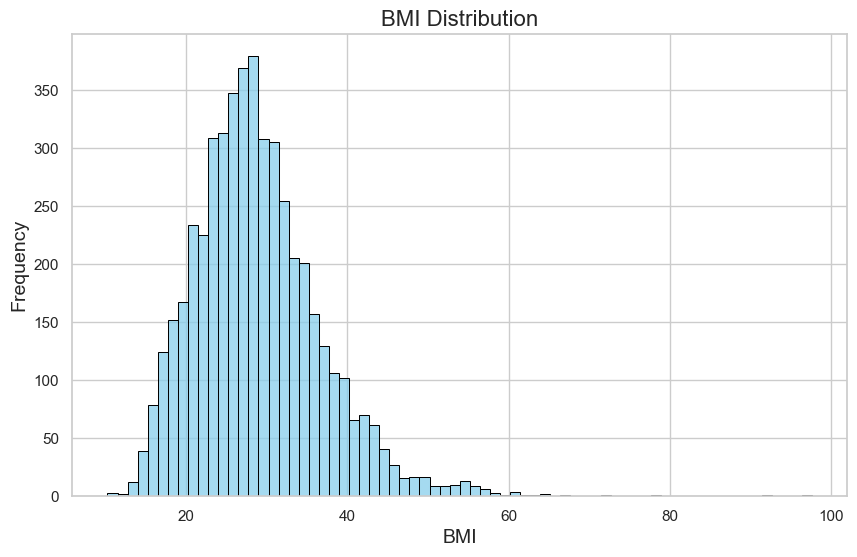

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'].dropna(), bins=70, kde=False, color='skyblue', edgecolor='black')

plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

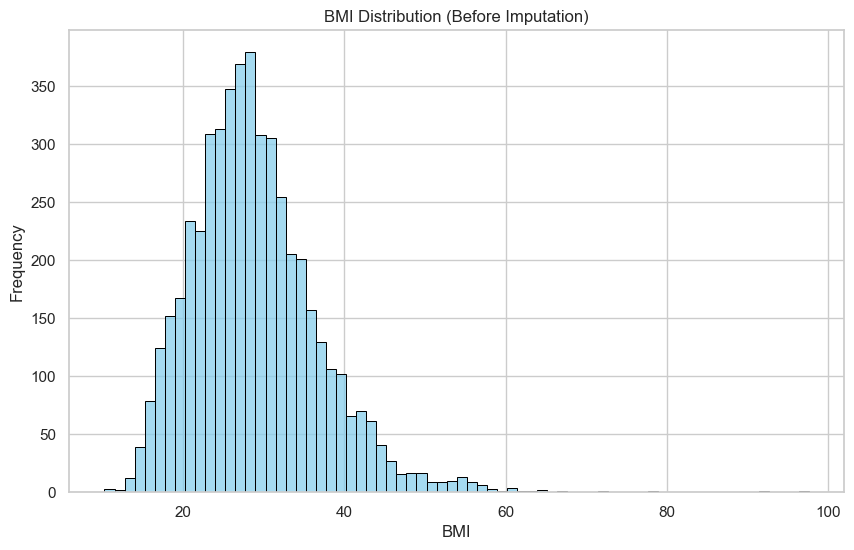

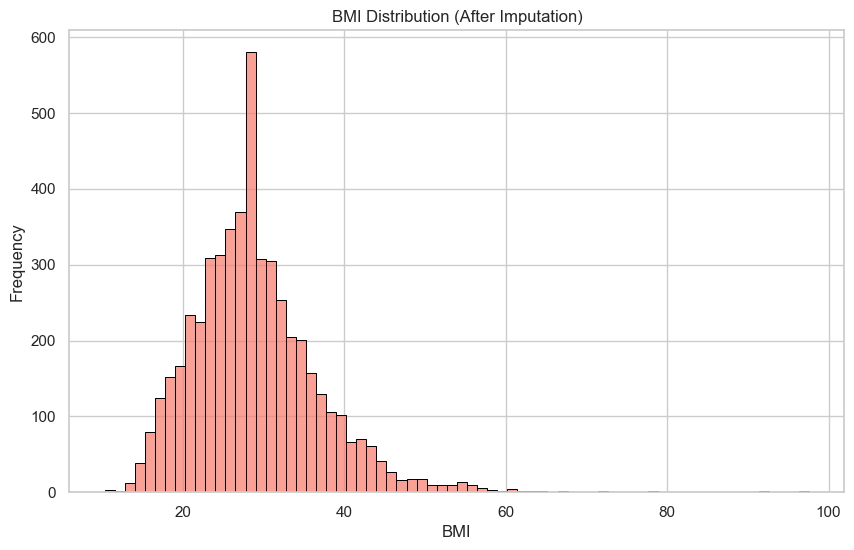

In [17]:
bmi_column = df[['bmi']]

plt.figure(figsize=(10, 6))
sns.histplot(bmi_column['bmi'].dropna(), bins=70, kde=False, color='skyblue', edgecolor='black')
plt.title('BMI Distribution (Before Imputation)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(bmi_column)

plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=70, kde=False, color='salmon', edgecolor='black')
plt.title('BMI Distribution (After Imputation)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [18]:

df.drop(['id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_cols])
new_df = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out())
new_df

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df.drop(categorical_cols,axis=1,inplace=True)
data = pd.concat([df,new_df],axis=1)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5106,81.0,0,0,125.20,40.000000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5107,35.0,0,0,82.99,30.600000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,166.29,25.600000,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
X = data.drop('stroke', axis=1)
y = data['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [22]:
smote = SMOTE(random_state=42, sampling_strategy=0.4, k_neighbors=10)

X_resampled, y_resampled = smote.fit_resample(X, y)
X = X_resampled
y = y_resampled

In [23]:

data.shape

(5110, 17)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(64,), (32,), (64, 32), (32, 16), (128,), (128, 64), (256,), (256, 128), (512, 256, 128), (512, 256)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(64,), (32,), (64, 32),
                                                (32, 16), (128,), (128, 64),
                                                (256,), (256, 128),
                                                (512, 256, 128), (512, 256)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='f1')

In [26]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'hidden_layer_sizes': (512, 256, 128), 'learning_rate_init': 0.001}


Best Hyperparameters:

hidden_layer_sizes: (512, 256, 128)
learning_rate_init: 0.001

Hidden Layer Sizes:
The best model has three hidden layers with sizes 512, 256, and 128 nodes, respectively.
This configuration suggests a deep neural network architecture, allowing the model to learn complex representations.

Learning Rate Initialization:
The learning rate is initialized at 0.001.
A relatively low learning rate may contribute to stable and smooth convergence during training.

In [27]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
f1_test_score = f1_score(y_test, predictions)
print("F1-Score on the test set:", f1_test_score)


F1-Score on the test set: 0.8483353884093712


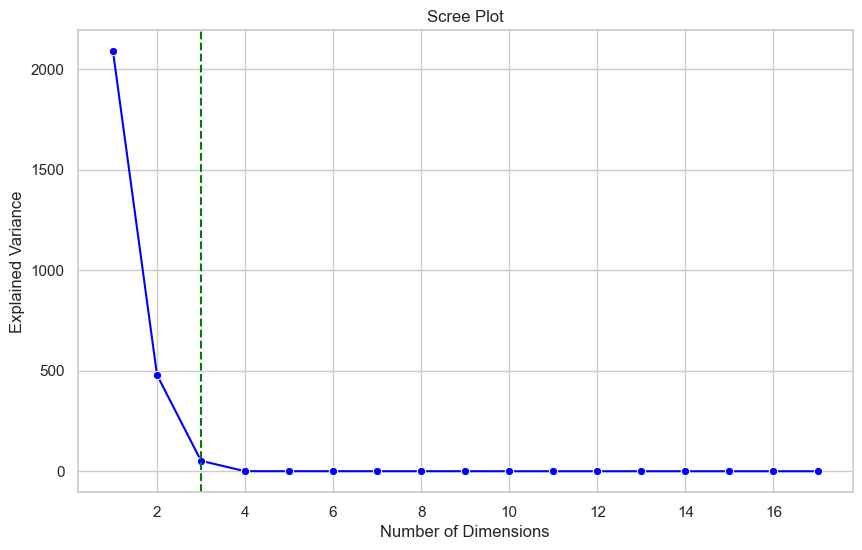

In [28]:
pca = PCA()
X_pca = pca.fit_transform(data)
explained_variance = pca.explained_variance_

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(explained_variance) + 1), y=explained_variance, marker='o', color='blue')
plt.axvline(x=3, ls='--', color='green')
plt.title('Scree Plot')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance')

plt.show()

In [30]:
optimal_dimensions = 3


pca = PCA(n_components=optimal_dimensions)
X_pca = pca.fit_transform(X)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

grid_search_pca = GridSearchCV(mlp, param_grid, cv=3, scoring='f1')
grid_search_pca.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'hidden_layer_sizes': [(64,), (32,), (64, 32),
                                                (32, 16), (128,), (128, 64),
                                                (256,), (256, 128),
                                                (512, 256, 128), (512, 256)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='f1')

In [31]:
best_model_pca = grid_search_pca.best_estimator_
print("Best hyperparameters for PCA Model:", best_model_pca)
predictions_pca = best_model_pca.predict(X_test_pca)
f1_test_pca = f1_score(y_test_pca, predictions_pca)
print("F1-Score on Test Set after PCA:", f1_test_pca)

Best hyperparameters for PCA Model: MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
F1-Score on Test Set after PCA: 0.5875542691751086


In [33]:
f1_before_reduction = f1_test_score * 100
f1_after_reduction = f1_test_pca * 100

print(f"F1-Score before dimensionality reduction: {f1_before_reduction:.2f}")
print(f"F1-Score after dimensionality reduction: {f1_after_reduction:.2f}")

if f1_after_reduction > f1_before_reduction:
    print("Dimensionality reduction led to performance enhancement.")
else:
    print("Dimensionality reduction did not lead to performance enhancement.")


F1-Score before dimensionality reduction: 84.83
F1-Score after dimensionality reduction: 58.76
Dimensionality reduction did not lead to performance enhancement.


Before Dimensionality Reduction:
F1-Score: 84.83%
 * Model performance was relatively high without dimensionality reduction.

After Dimensionality Reduction:
F1-Score: 58.76%
* Model performance decreased after applying dimensionality reduction.

Conclusion:
Dimensionality reduction did not lead to performance enhancement. instead, it resulted in a reduction in the F1-Score.

Observed Points:
- The original feature set without dimensionality reduction performed well.
- The reduced feature space may not have captured all relevant information, leading to decreased model performance.